In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import gc
#import pingouin
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ** Corrected demographics below**

---




In [ ]:
#we decided to utilize demographics to determine if there was any inequality
#between parishes that had different demographics makeup
#along with the different ranges of income within these
#differt parishes

#2010-2020 demographics data
ten_twenty = pd.read_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/Extended Analysis/Census demographics data/2010-2020/CC-EST2020-ALLDATA.csv", encoding = "latin")
#year column is weird, ranges from 1 to 13, not sure if this corresponds to 2010+ YEAR?

#the dates are labeled based on estimates
#created a dictionary to translate between the number and year value

#these years just correlate to a population estimate
# 1 = 4/1/2010 Census population
# 2 = 4/1/2010 population estimates base
# 3 = 7/1/2010 population estimate
# 4 = 7/1/2011 population estimate
# 5 = 7/1/2012 population estimate
# 6 = 7/1/2013 population estimate
# 7 = 7/1/2014 population estimate
# 8 = 7/1/2015 population estimate
# 9 = 7/1/2016 population estimate
# 10 = 7/1/2017 population estimate
# 11 = 7/1/2018 population estimate
# 12 = 7/1/2019 population estimate
# 13 = 4/1/2020 population estimate
# 14 = 7/1/2020 population estimate

number_to_year_ten = {
    1: np.nan,
    2: np.nan,
    3: 2010,
    4: 2011,
    5: 2012,
    6: 2013,
    7: 2014,
    8: 2015,
    9: 2016,
    10: 2017,
    11: 2018,
    12: 2019,
    13: 2020,
    14: np.nan
}




#current demographics breakdown by census.gov on lousisina

# White alone, percent	62.4% X
# Black or African American alone, percent(a)	33.0% x
# American Indian and Alaska Native alone, percent(a)	0.8% x
# Asian alone, percent(a)	1.9% x
# Native Hawaiian and Other Pacific Islander alone, percent(a)	0.1% x
# Two or More Races, percent	1.8% x
# Hispanic or Latino, percent(b)	5.6% x 
# White alone, not Hispanic or Latino, percent	57.9% x



ten_twenty = ten_twenty[ten_twenty["STNAME"] == "Louisiana"]


#pertinent demographics for our analysis, the only one we didn't use was
#the white alone, not hispanic or latino because this leads to double counting
demo_list = ['TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 
             'WA_MALE', 'WA_FEMALE', 
             'BA_MALE','BA_FEMALE', 
             'IA_MALE', 'IA_FEMALE', 
             'AA_MALE', 'AA_FEMALE', 
             'NA_MALE', 'NA_FEMALE', 
             'TOM_MALE', 'TOM_FEMALE', 
             'H_MALE', 'H_FEMALE', ]


ten_twenty = ten_twenty.groupby(["CTYNAME","YEAR"])[demo_list].sum().reset_index()


#sum the male and female population for each of these values
ten_twenty["White alone"] = ten_twenty["WA_MALE"] + ten_twenty["WA_FEMALE"]
ten_twenty["Black or African American alone"] = ten_twenty["BA_MALE"] + ten_twenty["BA_FEMALE"]
ten_twenty["American Indian and Alaska Native alone"] = ten_twenty["IA_MALE"] + ten_twenty["IA_FEMALE"]
ten_twenty["Asian alone"] = ten_twenty["AA_MALE"] + ten_twenty["AA_FEMALE"]
ten_twenty["Native Hawaiian and Other Pacific Islander alone"] = ten_twenty["NA_MALE"] + ten_twenty["NA_FEMALE"]
ten_twenty["Hispanic or Latino"] = ten_twenty["H_MALE"] + ten_twenty["H_FEMALE"]
ten_twenty["Two or More Races"] = ten_twenty["TOM_MALE"] + ten_twenty["TOM_FEMALE"]

ten_twenty["exp_POP"] = ten_twenty["White alone"] + ten_twenty["Black or African American alone"] + ten_twenty["American Indian and Alaska Native alone"] + ten_twenty["Asian alone"] + ten_twenty["Native Hawaiian and Other Pacific Islander alone"] + ten_twenty["Two or More Races"]



census_demo_twenty = ten_twenty[["CTYNAME","YEAR","TOT_POP","White alone","Black or African American alone","American Indian and Alaska Native alone","Asian alone","Native Hawaiian and Other Pacific Islander alone","Hispanic or Latino","Two or More Races"]]


#apply the dictionary to the year column

census_demo_twenty.YEAR = census_demo_twenty.YEAR.apply(lambda x: number_to_year_ten[x])

census_demo_twenty = census_demo_twenty[census_demo_twenty['YEAR'].notna()]


census_demo_twenty[census_demo_twenty.YEAR == 2020]



#note* there are three 2010 rows due to the conversion of number to year, this will be fixed after combining the 2010-2020 data with the 2000-2010 data. 
#the fix is to perform groupby once again

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CTYNAME,YEAR,TOT_POP,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Two or More Races
12,Acadia Parish,2020.0,123836,98610,22300,498,394,40,3764,1994
25,Allen Parish,2020.0,50880,36696,11556,1278,314,18,1334,1018
38,Ascension Parish,2020.0,257330,185982,62438,1202,3658,192,15878,3858
51,Assumption Parish,2020.0,43242,29376,12764,358,230,30,1464,484
64,Avoyelles Parish,2020.0,79932,52854,24002,942,412,86,1662,1636
...,...,...,...,...,...,...,...,...,...,...
779,Webster Parish,2020.0,75886,47850,26020,434,372,26,1668,1184
792,West Baton Rouge Parish,2020.0,53584,30620,21608,126,392,32,1858,806
805,West Carroll Parish,2020.0,21292,17266,3460,180,60,6,894,320
818,West Feliciana Parish,2020.0,30930,16580,13696,68,264,14,514,308


In [ ]:
zero_ten = pd.read_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/Extended Analysis/Census demographics data/2000-2010/combined.csv" )


zero_ten = zero_ten[zero_ten["STNAME"] == "Louisiana"]



demo_list = ['TOT_POP', 'TOT_MALE', 'TOT_FEMALE', 
             'WA_MALE', 'WA_FEMALE', 
             'BA_MALE','BA_FEMALE', 
             'IA_MALE', 'IA_FEMALE', 
             'AA_MALE', 'AA_FEMALE', 
             'NA_MALE', 'NA_FEMALE', 
             'TOM_MALE', 'TOM_FEMALE', 
             'H_MALE', 'H_FEMALE', ]

zero_ten["YEAR"] = pd.to_numeric(zero_ten["YEAR"])
zero_ten["AGEGRP"] = pd.to_numeric(zero_ten["AGEGRP"])

for demo in demo_list:
  zero_ten[demo] = pd.to_numeric(zero_ten[demo])



zero_ten = zero_ten.groupby(["CTYNAME","YEAR"])[demo_list].sum().reset_index()


zero_ten["White alone"] = zero_ten["WA_MALE"] + zero_ten["WA_FEMALE"]
zero_ten["Black or African American alone"] = zero_ten["BA_MALE"] + zero_ten["BA_FEMALE"]
zero_ten["American Indian and Alaska Native alone"] = zero_ten["IA_MALE"] + zero_ten["IA_FEMALE"]
zero_ten["Asian alone"] = zero_ten["AA_MALE"] + zero_ten["AA_FEMALE"]
zero_ten["Native Hawaiian and Other Pacific Islander alone"] = zero_ten["NA_MALE"] + zero_ten["NA_FEMALE"]
zero_ten["Hispanic or Latino"] = zero_ten["H_MALE"] + zero_ten["H_FEMALE"]
zero_ten["Two or More Races"] = zero_ten["TOM_MALE"] + zero_ten["TOM_FEMALE"]

#experimental population to check against the actual total population
zero_ten["exp_POP"] = zero_ten["White alone"] + zero_ten["Black or African American alone"] + zero_ten["American Indian and Alaska Native alone"] + zero_ten["Asian alone"] + zero_ten["Native Hawaiian and Other Pacific Islander alone"] + zero_ten["Two or More Races"]



census_demo_zero = zero_ten[["CTYNAME","YEAR","TOT_POP","White alone","Black or African American alone","American Indian and Alaska Native alone","Asian alone","Native Hawaiian and Other Pacific Islander alone","Hispanic or Latino","Two or More Races"]]


#create dictionary for number to year conversion
# 1 = 4/1/2000 resident population estimates base
# 2 = 7/1/2000 resident population estimate
# 3 = 7/1/2001 resident population estimate
# 4 = 7/1/2002 resident population estimate
# 5 = 7/1/2003 resident population estimate
# 6 = 7/1/2004 resident population estimate
# 7 = 7/1/2005 resident population estimate
# 8 = 7/1/2006 resident population estimate
# 9 = 7/1/2007 resident population estimate
# 10 = 7/1/2008 resident population estimate
# 11 = 7/1/2009 resident population estimate
# 12 = 4/1/2010 resident 2010 Census population
# 13 = 7/1/2010 resident population estimate


#get 2000-2009 estiamtes
#get 2010 -2020 estimates 
#from other census data

number_to_year_zero = {
    1: np.nan,
    2: 2000,
    3: 2001,
    4: 2002,
    5: 2003,
    6: 2004,
    7: 2005,
    8: 2006,
    9: 2007,
    10: 2008,
    11: 2009,
    12: np.nan,
    13: np.nan
}

#apply the dictionary to the year column
census_demo_zero.YEAR = census_demo_zero.YEAR.apply(lambda x: number_to_year_zero[x])



census_demo_zero = census_demo_zero[census_demo_zero['YEAR'].notna()]

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-3-77aaac6ea1dc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zero_ten["YEAR"] = pd.to_numeric(zero_ten["YEAR"])
<ipython-input-3-77aaac6ea1dc>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [ ]:
#combing the two demographics dataframes

demo_list_new = ["TOT_POP", "White alone", "Black or African American alone", "American Indian and Alaska Native alone", "Asian alone", "Native Hawaiian and Other Pacific Islander alone", "Hispanic or Latino", "Two or More Races"]



#combine the two dataframes
census_zero_twenty = pd.concat([census_demo_zero, census_demo_twenty], axis=0)

#perform group by again to fix the rows modified by converting year number to actual year value
census_zero_twenty = census_zero_twenty.groupby(["CTYNAME","YEAR"])[demo_list_new].sum().reset_index()

parishes = ["Ascension Parish", "East Baton Rouge Parish", "East Feliciana Parish", "Iberville Parish", "Livingston Parish", "Pointe Coupee Parish", "St. Helena Parish", "West Baton Rouge Parish", "West Feliciana Parish","Caddo Parish"
,"Washington Parish", "Orleans Parish", "St. Bernard Parish", "St. Charles Parish", "Jefferson Parish", "Plaquemines Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish"]


census_zero_twenty = census_zero_twenty[census_zero_twenty["CTYNAME"].isin(parishes)]
census_zero_twenty = census_zero_twenty.rename(columns={"CTYNAME": "county", "YEAR": "year"})


census_zero_twenty.year = pd.to_datetime(census_zero_twenty['year'], format='%Y').dt.year

census_zero_twenty.head()
#census_zero_twenty.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/census_zero_twenty_datetime.csv")

,county,year,TOT_POP,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Hispanic or Latino,Two or More Races
42,Ascension Parish,2000,154670,121392,31562,438,558,38,3812,682
43,Ascension Parish,2001,158420,124214,32168,486,724,52,4298,776
44,Ascension Parish,2002,162758,127658,32694,534,882,58,4996,932
45,Ascension Parish,2003,167934,131920,33314,580,990,76,5394,1054
46,Ascension Parish,2004,172704,135554,34212,538,1098,90,5852,1212


In [ ]:
# The first graph represents total population by county. The following graphs represent the population of different demographic groups by county. Orleans, Jefferson, and St. Bernard had the most noticible drops in 
# population for total population and each of the demographic groups. 

# "TOT_POPTOT_POP
# Select the columns of interest: "TOT_POP"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'TOT_POP']]
# Use plotly.express to create the line plot
fig = px.line(census_zero_twenty_plot, x='year', y='TOT_POP', color='county', title='Population of Race and Ethnicity by County: Total Population')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

# "White alone"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'White alone']]
fig = px.line(census_zero_twenty_plot, x='year', y='White alone', color='county', title='Population of Race and Ethnicity by County: White')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

# "Black or African American alone"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'Black or African American alone']]
fig = px.line(census_zero_twenty_plot, x='year', y='Black or African American alone', color='county', title='Population of Race and Ethnicity by County: Black or African American')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

# "American Indian and Alaska Native alone"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'American Indian and Alaska Native alone']]
fig = px.line(census_zero_twenty_plot, x='year', y='American Indian and Alaska Native alone', color='county', title='Population of Race and Ethnicity by County: American Indian and Alaska Native')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

#"Asian alone"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'Asian alone']]
fig = px.line(census_zero_twenty_plot, x='year', y='Asian alone', color='county', title='Population of Race and Ethnicity by County: Asian')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

#"Native Hawaiian and Other Pacific Islander alone"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'Native Hawaiian and Other Pacific Islander alone']]
fig = px.line(census_zero_twenty_plot, x='year', y='Native Hawaiian and Other Pacific Islander alone', color='county', title='Population of Race and Ethnicity by County: Native Hawaiian and Other Pacific Islander')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

#"Hispanic or Latino"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'Hispanic or Latino']]
fig = px.line(census_zero_twenty_plot, x='year', y='Hispanic or Latino', color='county', title='Population of Race and Ethnicity by County: Hispanic or Latino')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()

#"Two or More Races"
census_zero_twenty_plot = census_zero_twenty[['county', 'year', 'Two or More Races']]
fig = px.line(census_zero_twenty_plot, x='year', y='Two or More Races', color='county', title='Population of Race and Ethnicity by County: Two or More Races')
fig.update_layout(yaxis_title='Population', xaxis_title="Year")
fig.show()


In [ ]:
census_holder = census_zero_twenty.copy()
census_population_count = census_holder[['county', 'year', 'TOT_POP']]
census_demograph = census_holder.drop(columns=['TOT_POP'])
census_demograph = pd.melt(census_demograph, id_vars=["county", "year"], var_name="race", value_name="value")
census_population_count['year'] = pd.to_datetime(census_population_count['year'], format='%Y').dt.year
census_demograph['year'] = pd.to_datetime(census_demograph['year'], format='%Y').dt.year
#census_population_count.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/census_population_count.csv")
#census_demograph.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/census_demograph.csv")

<ipython-input-6-164d93f2d37f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## ** Corrected T-test below with adjusted home value **

---




In [ ]:
! pip install cpi
import cpi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.8/29.8 MB 17.3 MB/s eta 0:00:00


/usr/local/lib/python3.8/dist-packages/cpi/__init__.py:42: StaleDataWarning: CPI data is out of date. To accurately inflate to today's dollars, you must run `cpi.update()`.
  warnings.warn(StaleDataWarning())


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Dec 29 19:19:36 2022

@author: Becca
"""

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


def fedData():
    """Federal HVI Data 100 = $100,000
    Cleaning data more and turning it from index values into $"""
    df = pd.read_excel('/content/drive/MyDrive/Team 55 [NEW]/Data/StLouis fed Housing data /Stlouisfedcleaned.xlsx')
    #cleaning
    df.drop(columns= ['Unnamed: 0'] , inplace=True)
    column_names = {'West Batonrouge Parish':'West Baton Rouge Parish','Batonrouge Parish':'East Baton Rouge Parish','New Orleans Metairie Parish':'Orleans Parish'}
    df = df.rename(columns = column_names)
    df['Date'] = df.Date.dt.year
    
    #Transpose the data so that the dframe has a header of years and 
    df2 = df.copy()
    df2 = df2.reset_index(drop=True).transpose().reset_index()
    df2.columns = df2.iloc[0]
    df2 = df2.iloc[1:]
    df2 = df2.rename(columns={"Date": "County"})
    df2 = df2.reset_index(drop = True)
    df2.iloc[:, 1:] = df2.iloc[:, 1:].apply(lambda x: x * 1)#000)
    #dropping Median House Income because other dataframes have this
    df2 = df2.drop(df.index[2])
    return df2

def zillowData():
    """@author: Eduardo
    
    """
    df = pd.read_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/zillow_data_update/zillow_all_homes.csv")
    #drop useless columns: RegionID, RegionType, StateName, State, Metro, StateCodeFIPS, MunicipalCodeFIPS, tier
    df.drop(columns=["RegionID", "RegionType", "StateName", "State", "Metro", "StateCodeFIPS", "MunicipalCodeFIPS", "tier"], inplace=True)
    keyCounty = ["Washington Parish", "Orleans Parish", "St. Bernard Parish", "St. Charles Parish", "Jefferson Parish", "Plaquemines Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish", "Ascension Parish", "East Baton Rouge Parish", "East Feliciana Parish", "Iberville Parish", "Livingston Parish", "Pointe Coupee Parish", "St. Helena Parish", "West Baton Rouge Parish", "West Feliciana Parish", "Caddo Parish"]
    
    df = df[df["RegionName"].isin(keyCounty)]
    df.rename(columns = {'RegionName':'County', 'Date':'Year'}, inplace = True)
    
    df["Year"] = pd.DatetimeIndex(df['Year']).year.astype(int)
    
    return df

def findMissing(df):
    """creates a dataframe of all null values"""
    #all the parish
    mask = df['Value'].isnull()
    missing = df[mask]
    #missing_parish_list = missing.County.unique()
    return missing


def fillNull(df1_melted,df2):
    """df1_melted: fed data melted to match zillow
    df2 is zillow data
    Fills the null values with the $ value from the fed data"""
    # df1 = fedData()
    df2 = findMissing(df2)

    # Iterate over the rows in missing
    for index, row in df2.iterrows():
        # Find the corresponding row in df1 based on the County and Year columns
        df1_row = df1_melted.loc[(df1_melted["County"] == row["County"]) & (df1_melted["Year"] == row["Year"])]
        # Check if the df1_row dataframe is empty
        if df1_row.empty:
            # Update the Value column in df2 with the default value if df1_row is empty
            df2.at[index, "Value"] = 0
        else:
            # Update the Value column in df2 with the corresponding value in df1
            df2.at[index, "Value"] = df1_row["Value"].values[0]
           
    return df2

def fedEq(df_z, df_f):
    """ 
    creates a coef value which is calculated from the mean of zillow data and the fed Index at the same year,
    creating a linear slope to multiply fed index by to change it to from a value index to $USD
    
    """
    df_f = df_f.melt(id_vars=["County"], value_vars=df_f.columns[1:], var_name="Year", value_name="Value")
    #creating a column of coefficients where each one is 1000 to change 100's to 100,000 value if it remains the same
    df_f['coef'] = 1000
    county_list = df_f.County.unique().tolist()
    for parish in county_list:
        ind = df_z[df_z.County == parish].Value.first_valid_index()
        if ind is None:# or not isinstance(ind, (int, float)):
            continue
        year = df_z.iloc[ind].Year
        #mean value of the parish and year with first valid non null value from zillow data
        dy2 = df_z.loc[(df_z.County == parish) & (df_z.Year == year)].Value.mean()
        #hvi number for that same year
        dy1 = df_f.loc[(df_f.County == parish) & (df_f.Year == year)].Value
        if dy1.shape[0] == 0:
            continue
        dy1 = dy1.iloc[0]
        if pd.isna(dy2) or pd.isna(dy1):
            continue
        m = dy2 / dy1
        df_f.loc[df_f.County == parish, 'coef'] = m
        
    df_f['Value'] = df_f['Value'] * df_f['coef']
    return df_f


def main():
    oldZillow = zillowData()
    oldFed = fedData()
    '''
    
    FIX HEREEEEE
    '''
    fed = fedEq(oldZillow,oldFed)
    print(fed.County.unique())
    print()
    #update
    missingZillow = fillNull(fed,oldZillow)
    print(missingZillow.County.unique())
    print()


    zillow = oldZillow.copy()
    zillow.update(missingZillow['Value'])
    print(zillow.County.unique())
    print()


    
    #cound not get data for these parish's so they are removed
    remove = ['Tangipahoa Parish', 'Ascension Parish','East Feliciana Parish'] 
    #keep the parishes that are not these
    zillow = zillow[~zillow.County.isin(remove)]
      
    return zillow
#print(main())

unaffected = ["Ascension Parish", "East Baton Rouge Parish", "East Feliciana Parish", "Iberville Parish", "Livingston Parish", "Pointe Coupee Parish", "St. Helena Parish", "West Baton Rouge Parish", "West Feliciana Parish","Caddo Parish"]
affected = ["Washington Parish", "Orleans Parish", "St. Bernard Parish", "St. Charles Parish", "Jefferson Parish", "Plaquemines Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish"]

df_plot = main()


df_plot = df_plot[df_plot.Year <= 2020]

df_plot['Value'] = df_plot.apply(lambda x: cpi.inflate(x['Value'],x['Year'],to=2020),axis=1)
df_plot.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/zillow.csv",index=False)

print(df_plot.County.unique())
print()
#write to file

df_plot = df_plot.groupby(by=['County','Year'], dropna=False).mean()
df_plot = df_plot.drop(columns=['SizeRank']).reset_index()
print(df_plot.County.nunique())
print()

#split up into affected and unaffected areas
df_unaffected = df_plot.loc[df_plot['County'].isin(unaffected)]
df_affected = df_plot.loc[df_plot['County'].isin(affected)]




['St. John the Baptist Parish' 'West Baton Rouge Parish' 'HPI La'
 'East Baton Rouge Parish' 'Caddo Parish' 'Iberville Parish'
 'Livingston Parish' 'Orleans Parish' 'Plaquemines Parish'
 'Pointe Coupee Parish' 'Shreveport Bossier Parish' 'St. James Parish'
 'St. Tammany Parish' 'Washington Parish' 'West Feliciana Parish'
 'Jefferson Parish']

['East Baton Rouge Parish' 'Caddo Parish' 'Livingston Parish'
 'Tangipahoa Parish' 'Ascension Parish' 'Washington Parish'
 'Iberville Parish' 'West Baton Rouge Parish' 'Plaquemines Parish'
 'Pointe Coupee Parish' 'East Feliciana Parish' 'West Feliciana Parish'
 'Orleans Parish']

['East Baton Rouge Parish' 'Jefferson Parish' 'Orleans Parish'
 'Caddo Parish' 'Livingston Parish' 'Tangipahoa Parish' 'Ascension Parish'
 'Washington Parish' 'Iberville Parish' 'West Baton Rouge Parish'
 'Plaquemines Parish' 'Pointe Coupee Parish' 'East Feliciana Parish'
 'West Feliciana Parish']

['East Baton Rouge Parish' 'Jefferson Parish' 'Orleans Parish'
 'Caddo Par

In [ ]:
print(df_unaffected.columns)

Index(['County', 'Year', 'Value'], dtype='object')


In [ ]:
#df_unaffected = census_zero_twenty.loc[census_zero_twenty['county'].isin(unaffected)]
#df_affected = census_zero_twenty.loc[census_zero_twenty['county'].isin(affected)]



unaffected_four = df_unaffected[df_unaffected.Year == 2004].sort_values(by = "Value")
cur_unaffected = list(df_unaffected.County.unique())

affected_four = df_affected[df_affected.Year == 2004].sort_values(by = "Value")
cur_affected = list(df_affected.County.unique())

#algorithm for matching parishes based on how close their 
#home values are
parish_pairs = dict()





def create_parish_pairs(parishes_a,homeValue_a ,parishes_b,homeValue_b ,parish_pairs):
  for parish_a in parishes_a:
    #make the initial comparison infinite to ensure
    #a smaller value is found when comparing home values
    #in the year 2004 
    diff = float("inf")
    #comparing the current parish against all other parishes in the other
    #group to see which one it is closest to
    cur_value_a = homeValue_a[homeValue_a.County == parish_a].Value.values[0]
    for parish_b in parishes_b:
      cur_value_b = homeValue_b[homeValue_b.County == parish_b].Value.values[0]
      cur_diff = abs(cur_value_a - cur_value_b )

      #if the current difference is smaller than the previous one
      #then add it to the dictionary with the corresonding parish
      if cur_diff < diff:
        diff = cur_diff
        parish_pairs[parish_a] = parish_b


create_parish_pairs(cur_unaffected,unaffected_four ,cur_affected,affected_four ,parish_pairs )
create_parish_pairs(cur_affected,affected_four ,cur_unaffected,unaffected_four ,parish_pairs )

df_test = pd.DataFrame(parish_pairs.items(), columns=['county1', 'county2'])

#df_test

df_test

,county1,county2
0,Caddo Parish,Washington Parish
1,East Baton Rouge Parish,Jefferson Parish
2,Iberville Parish,Washington Parish
3,Livingston Parish,Washington Parish
4,Pointe Coupee Parish,Washington Parish
5,West Baton Rouge Parish,Washington Parish
6,West Feliciana Parish,Jefferson Parish
7,Jefferson Parish,West Feliciana Parish
8,Orleans Parish,West Feliciana Parish
9,Plaquemines Parish,West Feliciana Parish


In [ ]:

from prettytable import PrettyTable

pre_test = PrettyTable(["Unaffected Parish", "Affected Parish", "t-value", "p-value"])
post_test = PrettyTable(["Unaffected Parish", "Affected Parish", "t-value", "p-value"])

In [ ]:
#now do t-test with these values


import scipy.stats as stats


def p_t_info(p,t):
  if t < 0:
    print("mean of the unaffected parish was lower than the mean of the affected parish")

  else:
    print("mean of the unaffected parish was higher than the mean of the affected parish")

  print()

  if p < 0.05:
    print("p-value was significant")


  else:
    print("p-value was NOT significant")
  print()


def pretest_posttest(parish_a,parish_b, df_affected, df_unaffected, unaffected_parishes):

  if parish_a in unaffected_parishes:

    affected = parish_b
    unaffected = parish_a

    #control pretest
    control_pretest = df_unaffected[df_unaffected.Year < 2005]
    control_pretest = control_pretest[control_pretest.County == parish_a].Value

    #control posttest
    control_posttest = df_unaffected[df_unaffected.Year >= 2005]
    control_posttest = control_posttest[control_posttest.County == parish_a].Value


    #experimental pretest
    experimental_pretest = df_affected[df_affected.Year < 2005]
    experimental_pretest = experimental_pretest[experimental_pretest.County == parish_b].Value


    #experimental posttest
    experimental_posttest = df_affected[df_affected.Year >= 2005]
    experimental_posttest = experimental_posttest[experimental_posttest.County == parish_b].Value

  else:

    affected = parish_a
    unaffected = parish_b

    #control pretest
    control_pretest = df_unaffected[df_unaffected.Year < 2005]
    control_pretest = control_pretest[control_pretest.County == parish_b].Value

    #control posttest
    control_posttest = df_unaffected[df_unaffected.Year >= 2005]
    control_posttest = control_posttest[control_posttest.County == parish_b].Value


    #experimental pretest
    experimental_pretest = df_affected[df_affected.Year < 2005]
    experimental_pretest = experimental_pretest[experimental_pretest.County == parish_a].Value


    #experimental posttest
    experimental_posttest = df_affected[df_affected.Year >= 2005]
    experimental_posttest = experimental_posttest[experimental_posttest.County == parish_a].Value

  

  t1, p1 = stats.ttest_rel(control_pretest,experimental_pretest)
  t2, p2 = stats.ttest_rel(control_posttest,experimental_posttest)



  print("Affected parish: ", affected)
  print("Unaffected parish: ", unaffected)


  print("PRETEST:")
  print("t1: ", t1, " p1: ", p1)


  p_t_info(p1,t1)
  if p1 < 0.05:
    pre_test.add_row([unaffected, affected, t1, p1])



    
  print()

  print("POSTTEST:")
  print("t2: ", t2, " p2: ", p2)

  if p2 < 0.05:
    post_test.add_row([unaffected, affected, t2, p2])

  p_t_info(p2,t2)





  print("------------------------------------------------------------------------------------------------")


In [ ]:

for parish_a, parish_b in parish_pairs.items():
  pretest_posttest(parish_a,parish_b, df_affected, df_unaffected, unaffected)

  



Affected parish:  Washington Parish
Unaffected parish:  Caddo Parish
PRETEST:
t1:  -59.214418277321045  p1:  4.870977268066599e-07
mean of the unaffected parish was lower than the mean of the affected parish

p-value was significant


POSTTEST:
t2:  0.1448111462088369  p2:  0.8867878175758777
mean of the unaffected parish was higher than the mean of the affected parish

p-value was NOT significant

------------------------------------------------------------------------------------------------
Affected parish:  Jefferson Parish
Unaffected parish:  East Baton Rouge Parish
PRETEST:
t1:  -22.632972284982063  p1:  2.257115713936137e-05
mean of the unaffected parish was lower than the mean of the affected parish

p-value was significant


POSTTEST:
t2:  -4.541503803362575  p2:  0.0003897253870776051
mean of the unaffected parish was lower than the mean of the affected parish

p-value was significant

-------------------------------------------------------------------------------------------

In [ ]:
pre_test

Unaffected Parish,Affected Parish,t-value,p-value
Caddo Parish,Washington Parish,-59.214418277321045,4.870977268066599e-07
East Baton Rouge Parish,Jefferson Parish,-22.632972284982063,2.257115713936137e-05
Iberville Parish,Washington Parish,10.82053884076305,0.0004138312855097612
West Baton Rouge Parish,Washington Parish,33.38600926236494,4.800650813954187e-06
West Feliciana Parish,Jefferson Parish,-30.780273363207414,6.637607417712045e-06
West Feliciana Parish,Jefferson Parish,-30.780273363207414,6.637607417712045e-06
West Feliciana Parish,Orleans Parish,-12.226572700631145,0.00025692622074319725
West Feliciana Parish,Plaquemines Parish,-23.423998207062017,1.9690134690623193e-05


In [ ]:
post_test

Unaffected Parish,Affected Parish,t-value,p-value
East Baton Rouge Parish,Jefferson Parish,-4.541503803362575,0.0003897253870776051
Iberville Parish,Washington Parish,6.4163104024054745,1.1605839463826826e-05
Livingston Parish,Washington Parish,9.254424979096386,1.371173125148098e-07
Pointe Coupee Parish,Washington Parish,4.900070411460037,0.00019232013922476407
West Baton Rouge Parish,Washington Parish,8.983347865389733,2.008479755665594e-07
West Feliciana Parish,Jefferson Parish,3.037622604043011,0.008310608211547799
West Feliciana Parish,Jefferson Parish,3.037622604043011,0.008310608211547799
West Feliciana Parish,Plaquemines Parish,-11.151356645703082,1.169968762686363e-08
Pointe Coupee Parish,Washington Parish,4.900070411460037,0.00019232013922476407


In [ ]:
import prettytable
from IPython.display import display, HTML
pre_test.hrules = prettytable.ALL
pre_test.vrules = prettytable.ALL
display(HTML(post_test.get_html_string()))

## ** Corrected fema aid**

---




In [ ]:
#haStatus is a column in the fema dataset that contains information about the status of the haAmount which is housing assistance amount
#if the hasStatus the haAmount should be zero since the applicant didn't qualify for that type of assistance.

#this lambda function takes care of this

counties = ["Washington Parish", "Orleans Parish", "St. Bernard Parish", "St. Charles Parish", "Jefferson Parish", "Plaquemines Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish", "Ascension Parish", "East Baton Rouge Parish", "East Feliciana Parish", "Iberville Parish", "Livingston Parish", "Pointe Coupee Parish", "St. Helena Parish", "West Baton Rouge Parish", "West Feliciana Parish", "Caddo Parish"]
fema_df = pd.read_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/FEMA_cleaned/IndividualsAndHouseholdsProgramValidRegistrations_katOnly.csv")

eligible = ["ER - Eligible - Rental Assistance", "408-CLC", "ENC - Eligible - No change on appeal, original eligible status stands", "EAH - Eligible - Expedited Housing Assistance", "ERFD - Eligible - Readily Fabricated Dwelling", "ERPLZ - Eligible Replacement Housing, Flood Insurance Required", "ERPL - Eligible Replacement Housing", "EHR - Eligible - Home Repairs", "ERCT - Eligible - Recertification", "EHRZ - Eligible - Home Repairs, Flood Insurance Required", "TSAI - Transitional Shelter Assistance Information", "ETR - Eligible - Transient Housing", "ERFI - Eligible - Rental, Flood Insurance", "ERSUPP - Eligible - Recertification Supplement", "ERIA - Eligible - Inaccessible", "ERU - Eligible - Utilities Out", "ENCOMP - Eligible - Two months non-compliance", "EAHA - Eligible - Accelerated Housing Assistance", "ECR - Eligible - Created Resources", "EHRS - Eligible - Home Repair SBA Referral", "TSA - Transitional Sheltering Assistance"]  



fema_df.haAmount = fema_df.apply(lambda row: 0 if str(row.haStatus) not in eligible else row.haAmount, axis=1)

#simple data cleaning to be consistent with parish naming convention
fema_df["county"] = fema_df["county"].str.replace(" (Parish)"," Parish",regex = False)

fema_df = fema_df[fema_df["county"].isin(counties)]

keep = ['incidentType', 'declarationDate', 'disasterNumber', 'county','damagedStateAbbreviation',  'grossIncome', 'ownRent', 'primaryResidence','residenceType', 'homeOwnersInsurance', 'floodInsurance','registrationMethod', 'ihpAmount','fipAmount',   'haAmount', 'onaAmount', 'utilitiesOut', 'homeDamage','autoDamage', 'emergencyNeeds', 'foodNeed', 'shelterNeed','accessFunctionalNeeds',   'sbaApproved', 'inspnIssued','inspnReturned', 'habitabilityRepairsRequired', 'rpfvl', 'ppfvl','renterDamageLevel', 'destroyed','floodDamageAmount', 'foundationDamageAmount', 'roofDamageAmount','tsaEligible', 'tsaCheckedIn', 'rentalAssistanceAmount',  'repairAmount','replacementAmount','personalPropertyAmount']


fema_df = fema_df[keep]


fema_df["year"] = pd.to_datetime(fema_df['declarationDate']).dt.to_period('Y')
#these are the various sources of fema aid given to fema applicants

# remove extraneous sources of aid
fema_df["fema_aid"] = (fema_df["haAmount"] + fema_df["onaAmount"] )

#columns that relate to damage assessed by fema
fema_df["fema_assessed_damage"] = (fema_df["floodDamageAmount"] + fema_df["foundationDamageAmount"] + fema_df["roofDamageAmount"])
fema_df["left_over_aid"] = fema_df["fema_aid"] - fema_df["fema_assessed_damage"]
#fema_df



/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (9,10,11,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/pandas/core/arrays/datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [ ]:
#fema_df.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/fema_df.csv")

In [ ]:
mean_fema_aid = fema_df.groupby('county')['fema_aid'].mean()
mean_fema_aid

county
Ascension Parish                738.414289
East Baton Rouge Parish         572.300730
East Feliciana Parish           829.626528
Iberville Parish                877.086200
Jefferson Parish               3440.235700
Livingston Parish               805.647339
Orleans Parish                 6619.074331
Plaquemines Parish             6553.267290
Pointe Coupee Parish            672.656811
St. Bernard Parish             7557.803555
St. Charles Parish             1238.932488
St. Helena Parish              1116.008932
St. James Parish                934.831554
St. John the Baptist Parish    1024.747088
St. Tammany Parish             3225.499706
Tangipahoa Parish              1054.416020
Washington Parish              1628.819777
West Baton Rouge Parish         575.746288
West Feliciana Parish           649.484758
Name: fema_aid, dtype: float64

In [ ]:
count_fema_aid = fema_df.groupby('county')['fema_aid'].count()
count_fema_aid

county
Ascension Parish                10263
East Baton Rouge Parish         50792
East Feliciana Parish            3162
Iberville Parish                 5034
Jefferson Parish               275747
Livingston Parish               17909
Orleans Parish                 365891
Plaquemines Parish              17240
Pointe Coupee Parish             2201
St. Bernard Parish              42202
St. Charles Parish              23227
St. Helena Parish                2753
St. James Parish                 6672
St. John the Baptist Parish     19418
St. Tammany Parish             109804
Tangipahoa Parish               44738
Washington Parish               22773
West Baton Rouge Parish          2263
West Feliciana Parish             723
Name: fema_aid, dtype: int64

In [ ]:
sum_fema_aid = fema_df.groupby('county')['fema_aid'].sum()
sum_fema_aid

county
Ascension Parish               7.578346e+06
East Baton Rouge Parish        2.906830e+07
East Feliciana Parish          2.623279e+06
Iberville Parish               4.415252e+06
Jefferson Parish               9.486347e+08
Livingston Parish              1.442834e+07
Orleans Parish                 2.421860e+09
Plaquemines Parish             1.129783e+08
Pointe Coupee Parish           1.480518e+06
St. Bernard Parish             3.189544e+08
St. Charles Parish             2.877668e+07
St. Helena Parish              3.072373e+06
St. James Parish               6.237196e+06
St. John the Baptist Parish    1.989854e+07
St. Tammany Parish             3.541728e+08
Tangipahoa Parish              4.717246e+07
Washington Parish              3.709311e+07
West Baton Rouge Parish        1.302914e+06
West Feliciana Parish          4.695775e+05
Name: fema_aid, dtype: float64

In [ ]:
sum_damage = fema_df.groupby('county')['fema_assessed_damage'].sum()
sum_damage

county
Ascension Parish               1.492478e+06
East Baton Rouge Parish        5.227323e+06
East Feliciana Parish          9.380734e+05
Iberville Parish               1.115040e+06
Jefferson Parish               9.162595e+08
Livingston Parish              3.006721e+06
Orleans Parish                 3.597791e+09
Plaquemines Parish             4.287886e+08
Pointe Coupee Parish           4.633317e+05
St. Bernard Parish             1.480345e+09
St. Charles Parish             6.179657e+06
St. Helena Parish              3.731590e+05
St. James Parish               1.234607e+06
St. John the Baptist Parish    4.932420e+06
St. Tammany Parish             4.094787e+08
Tangipahoa Parish              8.008467e+06
Washington Parish              8.846942e+06
West Baton Rouge Parish        6.654912e+05
West Feliciana Parish          1.422154e+05
Name: fema_assessed_damage, dtype: float64

In [ ]:
# The following code aggregates the total IHP aid distributed to each parish we're including in our analysis. It also includes the total damage by parish and the ratio between aid and damage. However, this ratio is 
# is not necessarily useful. While these ratios SEEM to indicate certain parishes received more aid than they accumulated in damage, the damage assesments included by FEMA are likely incomplete. Not all homeowners that received housing assistance
# in the form of rental assistance got damage assesments from FEMA so we should assume the damage column is an underestimate of the real total damage. We also have to be careful about how we think about this ratio.
# FEMA aid is primarily emergency aid. Not all of this aid is going towards making a home livable again. A lot of it goes to replacing a variety of basic needs like food, water, clothing, medication, and hygiene products.

ratio_aid_to_damage = pd.DataFrame({'aid' : sum_fema_aid, 'damage' : sum_damage})
ratio_aid_to_damage['ratio'] = ratio_aid_to_damage['aid']/ratio_aid_to_damage['damage']
ratio_aid_to_damage

,aid,damage,ratio
county,,,
Ascension Parish,7.578346e+06,1.492478e+06,5.077694
East Baton Rouge Parish,2.906830e+07,5.227323e+06,5.560838
East Feliciana Parish,2.623279e+06,9.380734e+05,2.796454
Iberville Parish,4.415252e+06,1.115040e+06,3.959727
Jefferson Parish,9.486347e+08,9.162595e+08,1.035334
Livingston Parish,1.442834e+07,3.006721e+06,4.798696
Orleans Parish,2.421860e+09,3.597791e+09,0.673152
Plaquemines Parish,1.129783e+08,4.287886e+08,0.263483
Pointe Coupee Parish,1.480518e+06,4.633317e+05,3.195373


In [ ]:
income_ranges = ['0','<$15,000','$15,000-$30,000','$30,001-$60,000','$60,001-$120,000','$120,001-$175,000','>$175,000']

fema_df['grossIncome'] = fema_df['grossIncome'].astype(pd.CategoricalDtype(categories=income_ranges, ordered=True))


grouped_income_county = fema_df.groupby(['county', 'grossIncome'])['fema_aid'].sum().reset_index()
grouped_income_county.head(10)

,county,grossIncome,fema_aid
0,Ascension Parish,0,827046.54
1,Ascension Parish,"<$15,000",3770744.60
2,Ascension Parish,"$15,000-$30,000",1688402.67
3,Ascension Parish,"$30,001-$60,000",785733.98
4,Ascension Parish,"$60,001-$120,000",403363.51
5,Ascension Parish,"$120,001-$175,000",36825.16
6,Ascension Parish,">$175,000",66229.39
7,East Baton Rouge Parish,0,4217558.17
8,East Baton Rouge Parish,"<$15,000",16037589.64
9,East Baton Rouge Parish,"$15,000-$30,000",5843185.23


In [ ]:
fig = px.sunburst(grouped_income_county, path=['county', 'grossIncome'], values='fema_aid')

fig.update_layout(title='FEMA Aid Distributed by County and Income Range',
                  legend=dict(title='county'))
fig.update_layout(width=1200, height=1000)

fig.show()

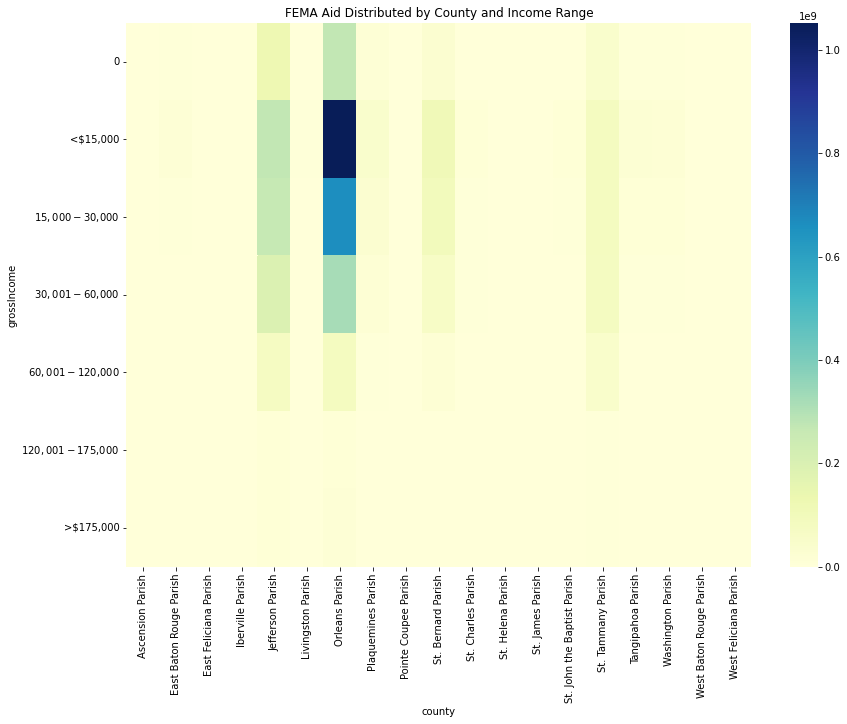

In [ ]:
#heatmap of same data using plotly
heatmap_data = grouped_income_county.pivot(index='grossIncome', columns='county', values='fema_aid')
fig = go.Figure(data=go.Heatmap(z=heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, colorscale='Greens'))
fig.update_layout(title='FEMA Aid Distributed by County and Income Range')
fig.show()

#now using seaborn

heatmap_data = grouped_income_county.pivot(index='grossIncome', columns='county', values='fema_aid')
fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu')
plt.title('FEMA Aid Distributed by County and Income Range')
plt.show()

In [ ]:
fig = px.box(fema_df, x='grossIncome', y='fema_aid', color='ownRent', color_discrete_sequence= px.colors.sequential.Tealgrn_r)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.update_xaxes(categoryorder='array', categoryarray= ['0','<$15,000','$15,000-$30,000','$30,001-$60,000','$60,001-$120,000','$120,001-$175,000','>$175,000'])

fig.update_layout(xaxis_title="Self Reported Income", yaxis_title="Dollar Amount Approved")

fig.update_layout(title='Distribution of IHP Aid Approved by Income Range')

fig.update_traces(boxpoints=False) 

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
no_fema_df = fema_df[fema_df['county']== 'Orleans Parish']

fig = px.box(no_fema_df, x='grossIncome', y='fema_aid', color='ownRent', color_discrete_sequence= px.colors.sequential.Teal_r)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.update_xaxes(categoryorder='array', categoryarray= ['0','<$15,000','$15,000-$30,000','$30,001-$60,000','$60,001-$120,000','$120,001-$175,000','>$175,000'])

fig.update_layout(xaxis_title="Self Reported Income", yaxis_title="Dollar Amount Approved")

fig.update_layout(title='Distribution of IHP Aid Approved by Income Range: Orleans Parish')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
jf_fema_df = fema_df[fema_df['county']== 'Jefferson Parish']

fig = px.box(jf_fema_df, x='grossIncome', y='fema_aid', color='ownRent', color_discrete_sequence= px.colors.sequential.Teal_r)
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default

fig.update_xaxes(categoryorder='array', categoryarray= ['0','<$15,000','$15,000-$30,000','$30,001-$60,000','$60,001-$120,000','$120,001-$175,000','>$175,000'])

fig.update_layout(xaxis_title="Self Reported Income", yaxis_title="Dollar Amount Approved")

fig.update_layout(title='Distribution of IHP Aid Approved by Income Range: Jefferson Parish')

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# We use .describe() and .mean() to extract important metrics
# First we do it for the whole fema_aid column
a = fema_df['fema_aid'].describe().round(2)
b = fema_df['fema_aid'].mean().round(2)
print(a)
print('mean =', b )


count    1022812.00
mean        4262.97
std         6602.70
min            0.00
25%            0.00
50%         2000.00
75%         4549.72
max        62185.75
Name: fema_aid, dtype: float64
mean = 4262.97


In [ ]:
# Then by renter
renter = fema_df[(fema_df['ownRent'] == 'Renter')]
desc_renter = renter['fema_aid'].describe().round(2)
print(desc_renter)

count    527490.00
mean       5008.09
std        7209.44
min           0.00
25%           0.00
50%        2000.00
75%        6459.58
max       62185.75
Name: fema_aid, dtype: float64


In [ ]:
# Then by owner
owner = fema_df[(fema_df['ownRent'] == 'Owner')]
desc_owner = owner['fema_aid'].describe().round(2)
print(desc_owner)

count    475609.00
mean       3591.47
std        5853.56
min           0.00
25%           0.00
50%        2000.00
75%        4358.00
max       58123.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: 0 
income_0 = fema_df[fema_df['grossIncome']== '0']
desc_0 = income_0['fema_aid'].describe().round(2)
print(desc_0)

count    162801.00
mean       3141.10
std        5428.98
min           0.00
25%           0.00
50%           0.00
75%        4358.00
max       53688.67
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: 0 and renter
income_0_renter = fema_df[(fema_df['grossIncome']== '0') & (fema_df['ownRent'] == 'Renter')]
desc_greater_0_renter = income_0_renter['fema_aid'].describe().round(2)
print(desc_greater_0_renter)

count    84960.00
mean      3482.14
std       5851.58
min          0.00
25%          0.00
50%          0.00
75%       4358.00
max      51906.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: 0 and owner
income_0_owner = fema_df[(fema_df['grossIncome']== '0') & (fema_df['ownRent'] == 'Owner')]
desc_greater_0_owner = income_0_owner['fema_aid'].describe().round(2)
print(desc_greater_0_owner)

count    72444.00
mean      2953.89
std       5014.92
min          0.00
25%          0.00
50%        791.40
75%       4358.00
max      53688.67
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: <$15,000
income_less_15 = fema_df[fema_df['grossIncome']== '<$15,000']
desc_less_15 = income_less_15['fema_aid'].describe().round(2)
print(desc_less_15)

count    315722.00
mean       5229.12
std        7590.25
min           0.00
25%           0.00
50%        2000.00
75%        7557.34
max       55897.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: <$15,000 and renter
income_less_15_renter = fema_df[(fema_df['grossIncome']== '<$15,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_less_15_renter = income_less_15_renter['fema_aid'].describe().round(2)
print(desc_greater_less_15_renter)

count    218532.00
mean       5600.23
std        7610.01
min           0.00
25%           0.00
50%        2000.00
75%       10063.38
max       54803.97
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: <$15,000 and owner
income_less_15_owner = fema_df[(fema_df['grossIncome']== '<$15,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_less_15_owner = income_less_15_owner['fema_aid'].describe().round(2)
print(desc_greater_less_15_owner)

count    91523.00
mean      4615.56
std       7615.89
min          0.00
25%          0.00
50%       1470.32
75%       4482.12
max      55897.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $15,000-$30,000
income_15_30 = fema_df[fema_df['grossIncome']== '$15,000-$30,000']
desc_15_30 = income_15_30['fema_aid'].describe().round(2)
print(desc_15_30)


count    253711.00
mean       4669.87
std        7116.33
min           0.00
25%           0.00
50%        2000.00
75%        5195.76
max       58123.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $15,000-$30,000 and renter
income_15_30_renter = fema_df[(fema_df['grossIncome']== '$15,000-$30,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_15_30_renter = income_15_30_renter['fema_aid'].describe().round(2)
print(desc_greater_15_30_renter)

count    144765.00
mean       5283.16
std        7524.91
min           0.00
25%           0.00
50%        2214.70
75%        6606.11
max       51381.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $15,000-$30,000 and owner
income_15_30_owner = fema_df[(fema_df['grossIncome']== '$15,000-$30,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_15_30_owner = income_15_30_owner['fema_aid'].describe().round(2)
print(desc_greater_15_30_owner)

count    105142.00
mean       3971.47
std        6514.83
min           0.00
25%           0.00
50%        2000.00
75%        4358.00
max       58123.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $30,001-$60,000
income_30_60 = fema_df[fema_df['grossIncome']== '$30,001-$60,000']
desc_30_60 = income_30_60['fema_aid'].describe().round(2)
print(desc_30_60)


count    187838.00
mean       3782.25
std        5765.00
min           0.00
25%           0.00
50%        2000.00
75%        4358.00
max       55046.97
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $30,001-$60,000 and renter
income_30_60_renter = fema_df[(fema_df['grossIncome']== '$30,001-$60,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_30_60_renter = income_30_60_renter['fema_aid'].describe().round(2)
print(desc_greater_30_60_renter)

count    64722.00
mean      4697.55
std       6716.30
min          0.00
25%          0.00
50%       3248.18
75%       5149.40
max      49237.76
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $30,001-$60,000 and owner
income_30_60_owner = fema_df[(fema_df['grossIncome']== '$30,001-$60,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_30_60_owner = income_30_60_owner['fema_aid'].describe().round(2)
print(desc_greater_30_60_owner)

count    120357.00
mean       3366.99
std        5164.38
min           0.00
25%           0.00
50%        2000.00
75%        4358.00
max       55046.97
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $60,001-$120,000
income_60_120 = fema_df[fema_df['grossIncome']== '$60,001-$120,000']
desc_60_120 = income_60_120['fema_aid'].describe().round(2)
print(desc_60_120)

count    79522.00
mean      3020.12
std       4212.49
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      62185.75
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $60,001-$120,000 and renter
income_60_120_renter = fema_df[(fema_df['grossIncome']== '$60,001-$120,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_60_120_renter = income_60_120_renter['fema_aid'].describe().round(2)
print(desc_greater_60_120_renter)

count    11368.00
mean      3794.69
std       5401.36
min          0.00
25%          0.00
50%       3156.00
75%       4358.00
max      62185.75
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $60,001-$120,000 and owner
income_60_120_owner = fema_df[(fema_df['grossIncome']== '$60,001-$120,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_60_120_owner = income_60_120_owner['fema_aid'].describe().round(2)
print(desc_greater_60_120_owner)

count    66925.00
mean      2938.35
std       3982.02
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      53200.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $120,001-$175,000
income_120_175 = fema_df[fema_df['grossIncome']== '$120,001-$175,000']
desc_120_175 = income_120_175['fema_aid'].describe().round(2)
print(desc_120_175)

count    11098.00
mean      2757.49
std       3628.33
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      44400.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $120,001-$175,000 and renter
income_120_175_renter = fema_df[(fema_df['grossIncome']== '$120,001-$175,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_120_175_renter = income_120_175_renter['fema_aid'].describe().round(2)
print(desc_greater_120_175_renter)

count     1052.00
mean      3256.41
std       5124.92
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      43440.59
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: $120,001-$175,000 and owner
income_120_175_owner = fema_df[(fema_df['grossIncome']== '$120,001-$175,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_120_175_owner = income_120_175_owner['fema_aid'].describe().round(2)
print(desc_greater_120_175_owner)

count     9808.00
mean      2765.64
std       3446.61
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      44400.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: >$175,000
income_greater_175 = fema_df[fema_df['grossIncome']== '>$175,000']
desc_greater_175 = income_greater_175['fema_aid'].describe().round(2)
print(desc_greater_175)

count    12119.00
mean      2630.62
std       3946.67
min          0.00
25%          0.00
50%       1006.10
75%       4358.00
max      45169.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: >$175,000 and renter
income_greater_175_renter = fema_df[(fema_df['grossIncome']== '>$175,000') & (fema_df['ownRent'] == 'Renter')]
desc_greater_175_renter = income_greater_175_renter['fema_aid'].describe().round(2)
print(desc_greater_175_renter)


count     2090.00
mean      3173.11
std       5247.35
min          0.00
25%          0.00
50%          0.00
75%       4358.00
max      37950.00
Name: fema_aid, dtype: float64


In [ ]:
# Then by self reported income: >$175,000 and owner
income_greater_175_owner = fema_df[(fema_df['grossIncome']== '>$175,000') & (fema_df['ownRent'] == 'Owner')]
desc_greater_175_owner = income_greater_175_owner['fema_aid'].describe().round(2)
print('owner \n', desc_greater_175_owner)

owner 
 count     9410.00
mean      2670.49
std       3658.38
min          0.00
25%          0.00
50%       2000.00
75%       4358.00
max      45169.00
Name: fema_aid, dtype: float64


In [ ]:
census_demo_five = census_zero_twenty[census_zero_twenty["year"] == 2005]
census_demo_five = census_demo_five.drop(['TOT_POP'], axis=1)
fema_five = fema_df.groupby(["county","year"])[["fema_aid","fema_assessed_damage"]].sum().reset_index()
#the year column isn't really necessary as we are only looking at the year 2005
fema_five.year = 2005

fema_five_income = fema_df[['county', 'year', 'grossIncome']]
fema_five_income = fema_five_income.groupby(['county', 'year', 'grossIncome']).size().unstack(fill_value=0).reset_index()

#convert 2005 period value to integer
fema_five_income.year = 2005

census_merge_fema = pd.merge(census_demo_five, fema_five, on=["county","year"])
census_merge_fema = pd.merge(census_merge_fema, fema_five_income, on=["county","year"])


affected = ["Washington Parish", "Orleans Parish", "St. Bernard Parish", "St. Charles Parish", "Jefferson Parish", "Plaquemines Parish", "St. James Parish", "St. John the Baptist Parish", "St. Tammany Parish", "Tangipahoa Parish"]

#create label column to determine if the county was affected or unaffected by hurricane katrina
census_merge_fema['Label'] = census_merge_fema['county'].apply(lambda x: "Affected" if x in affected else "Unaffected")
census_merge_fema

#census_merge_fema.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/census_merge_fema_2005_no_pop.csv")


census_merge_fema.year = pd.to_datetime(census_merge_fema['year'], format='%Y').dt.year
census_merge_fema
census_merge_fema.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/census_merge_fema_2005_no_pop_v2.csv")



In [ ]:


zillow_keep_before_2020 = pd.read_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/zillow.csv")



zillow_keep_before_2020 = zillow_keep_before_2020[zillow_keep_before_2020.Year <= 2020]

zillow_keep_before_2020.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/zillow_upto_2020.csv")


In [ ]:
#median income
medianIncomeFile = '/content/drive/MyDrive/Team 55 [NEW]/Data/Clean Data/Median_Income_FullClean.csv'

#create dfs
median_income_df_original = pd.read_csv(medianIncomeFile)

median_income_df = median_income_df_original.copy(deep = True)
median_income_df = median_income_df.transpose()
median_income_df.columns = median_income_df.iloc[0]
median_income_df = median_income_df.drop(median_income_df.index[0])
median_income_df['Year'] = median_income_df.index
median_income_df = median_income_df.melt(id_vars=["Year"], var_name="County", value_name="Median_income")

median_income_df['Year'] = pd.to_datetime(median_income_df['Year'],format = '%Y').dt.year
#df_plot = df_plot[df_plot['Year'] < 2021]

#ajust for inflation, Every value is in $ for 2020
median_income_df['Median_income'] = median_income_df.apply(lambda x: cpi.inflate(x['Median_income'],x['Year'],to=2020),axis=1)
#median_income_df.to_csv("/content/drive/MyDrive/Team 55 [NEW]/Data/dashboard_data/median_income_df.csv",index=False)